<class 'numpy.ndarray'> (250000,)


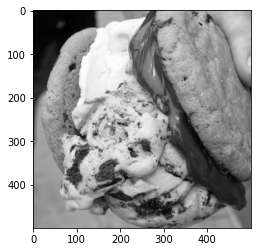

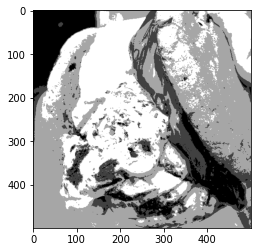

[2 2 2 ... 1 1 3]
[199.57422045  64.78286746  18.79622521 136.37430597]


In [110]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt


class kmeans(object):
  def __init__(self,x,k):
    self.x=x
    self.k=k


  def random_center(self):
    c=[]
    for _ in range(self.k):
      rand=random.randint(0,1000)
      c.append(rand)
      self.c0=np.array(c)
    return self.c0

  def new_label(self,c):
    mini=[]
    for i in range(self.x.shape[0]):
      ekh=[]
      for j in range(self.k):
        ekhtel=abs(self.x[i]-c[j])
        ekh.append(ekhtel)
        ekhtelaf=np.array(ekh)
      min=np.argmin(ekhtelaf)
      mini.append(min)
    self.newlabel=np.array(mini)
    return self.newlabel

  def new_center(self):
    average=[]
    for j in range(self.k):
      count=1
      sum=0
      for i in range(self.x.shape[0]):
        if self.newlabel[i]==j:
          count+=1
          sum += self.x[i]
      ave=sum/count
      average.append(ave)
    self.newcenter=np.array(average)
    return self.newcenter

  def fit (self):
    self.pre_label=self.new_label(self.random_center())
    l=0
    self.labelkhali=self.pre_label
    for _ in range(10):
      l+=1
      self.pre_label=self.labelkhali
      self.labelkhali=self.new_label(self.new_center())
      if np.all(self.pre_label == self.labelkhali) :
        
        break
    #print('iteration',l)

  def pic_out(self):
    for j in range(self.k):
      for i in range(self.x.shape[0]):
        if self.newlabel[i]==j:
          self.x[i]=self.newcenter[j]
    return (np.reshape(self.x,(500,500)))





x=np.array([2,3,4,10,15])

img = Image.open('dori.jpg').resize((500,500)).convert('L')
img_arr = np.array(img)
one_dim = np.reshape(img_arr,(500*500,))
print(type(one_dim),one_dim.shape)
plt.figure()
plt.imshow(img_arr,cmap='gray')
plt.show()
ax=kmeans(one_dim,4)
ax.fit()
output = ax.pic_out()
plt.figure()
plt.imshow(output,cmap='gray')
plt.show()

print(ax.newlabel)
print(ax.newcenter)



sklearn

<class 'numpy.ndarray'> (4235520, 1)


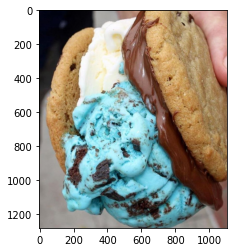

[[179.96074508]
 [ 64.70514483]]
[1 1 1 ... 1 1 1]


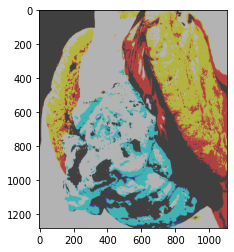

In [111]:
from sklearn.cluster import KMeans

img = Image.open('dori.jpg')
img_arr = np.array(img)
one_dim = np.reshape(img_arr,(1280*1103*3,))[:,np.newaxis]
print(type(one_dim),one_dim.shape)
plt.figure()
plt.imshow(img_arr,cmap='gray')
plt.show()



km=KMeans(2)
X=x[:,np.newaxis]


km.fit(one_dim)
print(km.cluster_centers_)
print(km.labels_)


for j in range(2):
  for i in range(one_dim.shape[0]):
    if km.labels_[i]==j:
      one_dim[i]=km.cluster_centers_[j]
out_pic=np.reshape(one_dim,(1280,1103,3))
plt.imshow(out_pic)
plt.show()




